## Determinación de $f_p$ para los filtros
### Análisis de la señal $x_2$
$x_2(t)=V_{max}\cdot sin(2\pi\cdot f_i\cdot t)$ definida para t entre 0 y $\frac{3}{2\cdot f_i}$, periódica. T=$\frac{3}{2\cdot f_i}$.

In [1]:
import scipy.signal as ss
import matplotlib.pyplot as plt
import numpy as np

Al ser $x_2(t)$ una funcion real y par, se puede realizar su desarrollo en serie trigonométrica de Fourier, sabiendo que $b_n = 0, \forall n$, ya que se trata de una señal par.
$$ x(t) = \frac{a_0}{2} + \sum_{n=1}^{\infty}a_n\cdot cos(2\pi n f_i\cdot t) $$
$$ a_0 = \frac{2}{T}\cdot \int_0^T x_2(t) dt = \frac{4\cdot A_{max}}{3\pi}$$
$$ a_n = \frac{2}{T}\cdot \int_0^T x_2(t)\cdot cos(2\pi n f_i \cdot t) dt = \frac{12 \cdot A_{max}}{(9-4n^2)\pi}$$
Para definir la frecuencia de corte del filtro antialiasing se busco conservar la mayor proporcion de potencia de la señal. Para lo cual se evaluo la potencia potencia acumulada para los respectivos armonicos.
$$ P = \frac{2f_i}{3}\cdot \int_0^{\frac{3}{2f_i}} |A_{max}\cdot sen(2\pi f_i \cdot t)|^2 dt = \frac{|a_0|^2}{4} + \sum_{n=1}^{\infty}\frac{|a_n|^2}{2}$$ 
$$ \frac{P_k}{P} = \frac{|a_0|^2 + \sum_{n=1}^{k}\frac{|a_n|^2}{2}}{P}, k\in \mathbb{N}$$

In [27]:
from sympy import integrate, sin, pi, Abs, factor, N
from sympy.abc import t,a,n

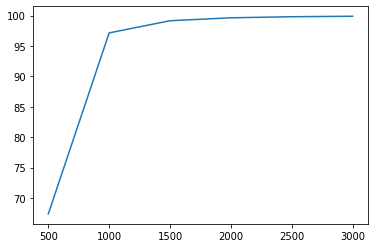

In [52]:
fun = sin(2*pi*500*t)
P = 6*500/3 * integrate(fun**2,(t,0, 1/(2*500)))
a_0 = 4/(3*pi)
a_n = 12/((9-4*n**2)*pi)
P_k = []
freq_k = []
for k in range(1,7):
    freq_k.append(k*500)
    P_k.append(N((a_0**2)/4, 5))
    for _n in range(1,k+1):
        P_k[k-1] += N(((a_n.subs(n,_n))**2)/2,5)
    P_k[k-1] = N(factor(P_k[k-1]/P*100), 5)

plt.plot(freq_k, P_k)
